In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
from tqdm import tqdm
import pandas as pd
from statistics import mode
from helper_functions import energy_name

In [2]:
%matplotlib inline

In [3]:
save_plot = True # False

# currentNotebook = ipyparams.notebook_name[:len(ipyparams.notebook_name)-6] # get name of currect notebook
# assert currentNotebook != '', "no notebook name, run cell again"

currentNotebook = "compare_MUSIC"

plot_dir = 'plots/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(plot_dir))

df_dir = 'data/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(df_dir))

0

In [4]:
df = pd.read_hdf('data/compare_MUSIC/MUSIC_2TeV_3km_water.hdf5')
df

,E_i,E_f,distances,deflection,x_dir_i,y_dir_i,z_dir_i,x_i,y_i,z_i,x_f,y_f,z_f
0,2000.0,0.200000,1604.874964,8.847735,0.0,0.0,1.0,0.0,0.0,0.0,-524.662556,201.134609,160479.941499
1,2000.0,687.083800,3000.000000,0.137316,0.0,0.0,1.0,0.0,0.0,0.0,313.408525,-105.517592,299999.641344
2,2000.0,470.082908,3000.000000,0.093675,0.0,0.0,1.0,0.0,0.0,0.0,114.018856,-31.357471,299999.912964
3,2000.0,488.508415,3000.000000,0.077297,0.0,0.0,1.0,0.0,0.0,0.0,-112.197193,-54.858427,299999.912052
4,2000.0,33.516930,3000.000000,0.790317,0.0,0.0,1.0,0.0,0.0,0.0,518.874108,140.390981,299997.966962
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2000.0,229.296663,3000.000000,0.146525,0.0,0.0,1.0,0.0,0.0,0.0,-79.062846,-237.807638,299999.383767
19996,2000.0,361.535478,3000.000000,0.028278,0.0,0.0,1.0,0.0,0.0,0.0,24.659560,-49.241266,299999.942537
19997,2000.0,687.624286,3000.000000,0.064488,0.0,0.0,1.0,0.0,0.0,0.0,133.190386,-55.838471,299999.938702
19998,2000.0,142.311117,3000.000000,0.376657,0.0,0.0,1.0,0.0,0.0,0.0,-586.390252,124.331768,299998.927287


In [5]:
E_i = df.E_i[0] * 1e3 # in MeV
E_f = mode(df.E_f) * 1e3 # in MeV 
n_events = len(df)

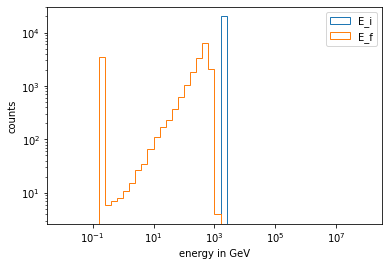

In [6]:
# energy
bins = np.logspace(-2, 8, 51)

plt.hist(df.E_i, bins=bins, histtype='step', label='E_i')
plt.hist(df.E_f, bins=bins, histtype='step', label='E_f')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('energy in GeV')
plt.ylabel('counts')
plt.legend()

Text(0.5, 0, 'propagation distance in meter')

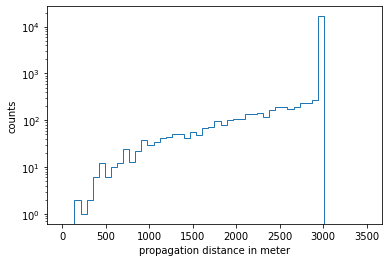

In [13]:
# propagation distance
bins = np.linspace(0, 3500, 51)

plt.hist(df.distances, bins=bins, histtype='step')
plt.yscale('log')
# plt.xscale('log')
plt.ylabel('counts')
plt.xlabel('propagation distance in meter')


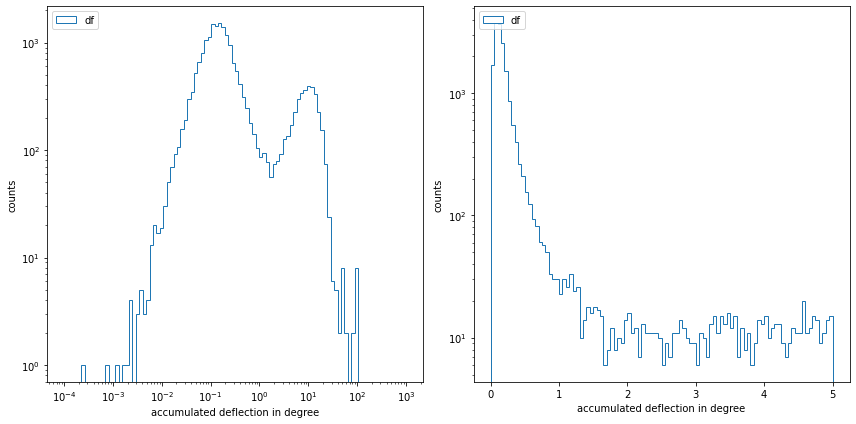

In [8]:
# Deflection
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

bins = np.logspace(-4, 3, 101)
ax[0].hist(df.deflection, bins=bins, histtype='step', label='df')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('accumulated deflection in degree')
ax[0].set_ylabel('counts')
ax[0].legend(loc='upper left')

bins = np.linspace(0, 5, 101)
ax[1].hist(df.deflection, bins=bins, histtype='step', label='df')
ax[1].set_yscale('log')
ax[1].set_xlabel('accumulated deflection in degree')
ax[1].set_ylabel('counts')
ax[1].legend(loc='upper left')


plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_accumulated_defl.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

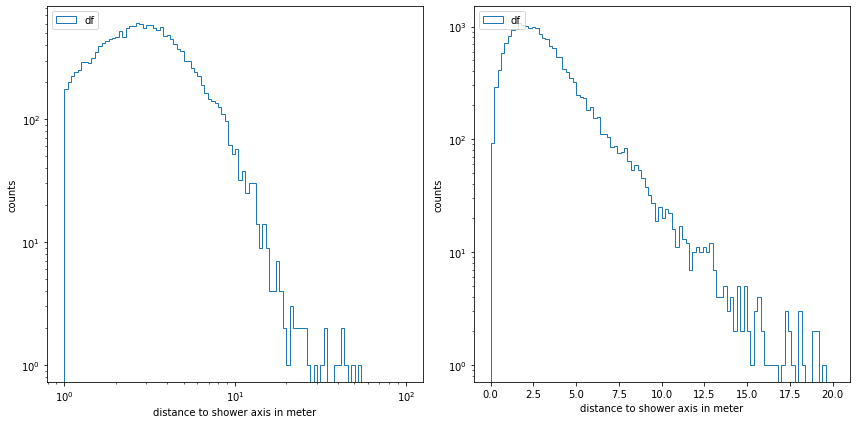

In [9]:
# Distance to shower axis 
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

d_shower = np.sqrt(df.x_f**2 + df.y_f**2) / 1e2 # in meter

bins = np.logspace(0, 2, 101)
ax[0].hist(d_shower, bins=bins, histtype='step', label='df')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('distance to shower axis in meter')
ax[0].set_ylabel('counts')
ax[0].legend(loc='upper left')

bins = np.linspace(0, 20, 101)
ax[1].hist(d_shower, bins=bins, histtype='step', label='df')
ax[1].set_yscale('log')
ax[1].set_xlabel('distance to shower axis in meter')
ax[1].set_ylabel('counts')
ax[1].legend(loc='upper left')


plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_distance_showeraxis.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

In [ ]:
max(df.deflection)